## Coding Exercise #0514

#### 1. Document classification with LSTM network:

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.reuters import load_data, get_word_index       # Reuters news data.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                  # Turn the warnings off.
%matplotlib inline

#### 1.1. Read in the data:

In [2]:
n_words = 1000                                        # Size of the vocabulary.
(X_train, y_train), (X_test, y_test) = load_data(num_words = n_words, test_split = 0.3)
n_train_size = X_train.shape[0]

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Check for the shapes.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (7859,)
Training data y shape: (7859,)
--------------------------------------------------
Test data X shape: (3369,)
Test data y shape: (3369,)
--------------------------------------------------


#### 1.2. Explore the data:

In [4]:
# Number of unique values of y = Number of categories of the newswires.
n_cat = pd.Series(y_train).nunique()
n_cat

46

In [5]:
# Print out an observation (document) contained in X.
# It is encoded as integers (indices).
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
# Let's check for length of the first 100 documents.
# We notice that the length is not uniform.
print([len(a) for a in X_train[0:100]])

[87, 56, 139, 224, 101, 116, 100, 100, 82, 106, 31, 59, 65, 316, 527, 76, 114, 17, 91, 77, 231, 108, 83, 29, 95, 110, 23, 373, 114, 354, 133, 222, 571, 155, 83, 208, 170, 269, 74, 19, 23, 78, 21, 377, 104, 299, 89, 56, 94, 139, 118, 36, 137, 107, 83, 66, 70, 112, 88, 51, 83, 123, 17, 185, 84, 52, 102, 73, 106, 486, 107, 82, 263, 172, 491, 190, 143, 62, 26, 88, 114, 38, 85, 112, 793, 104, 25, 21, 101, 28, 25, 81, 135, 73, 62, 18, 90, 266, 91, 64]


In [7]:
# Download the dictionary to translate the indices.
my_dict = get_word_index(path='reuters_word_index.json')

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# To view the dictionary.
# my_dict

In [9]:
# Exchange the 'key' and 'value'.
my_dict_inv = {v:k for k,v in my_dict.items()}

In [10]:
# Translate each document.
i_news = 10                                        # Document number that can be changed at will.
news = list(pd.Series(X_train[i_news]).apply(lambda x: my_dict_inv[x]))
print(' '.join(news))

the federal gain only growth lt they meeting year reuter company did year an they of of reuter company of of 1987 had of of reuter had profits of pct dlrs


#### 1.3. Data preprocessing:

In [11]:
# Padding: newswire lengths are uniformly matched to maxlen.
# Cut away if longer than maxlen and fill with 0s if shorter than maxlen.
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

In [12]:
# Apply one-hot-encoding to the y variable.
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,46)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]

#### 1.4. Define the model:

In [13]:
n_neurons = 100                   # Neurons within each memory cell.
n_input = 100                     # Dimension of the embeding space.

In [14]:
# LSTM network model.
my_model = Sequential()
my_model.add(Embedding(n_words, n_input))           # n_words = vocabulary size, n_input = dimension of the embedding space.
my_model.add(LSTM(units=n_neurons, return_sequences=False, input_shape=(None, n_input), activation='tanh'))
my_model.add(Dense(n_cat, activation='softmax'))

In [15]:
# View the summary.
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### 1.5. Define the optimizer and compile:

In [16]:
n_epochs = 20                      # Number of epochs.
batch_size = 20                    # Size of each batch.
learn_rate = 0.001                 # learning rate.

In [17]:
# Optimizer and compilation.
my_optimizer=Adam(learning_rate=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

#### 1.6. Train the model and visualize the history:

In [18]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 1)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.3581 - loss: 2.6153 - val_accuracy: 0.4955 - val_loss: 1.9603
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.5160 - loss: 1.9339 - val_accuracy: 0.5611 - val_loss: 1.6916
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.5733 - loss: 1.6879 - val_accuracy: 0.6069 - val_loss: 1.5815
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.6129 - loss: 1.5403 - val_accuracy: 0.6387 - val_loss: 1.4193
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.6534 - loss: 1.3722 - val_accuracy: 0.6571 - val_loss: 1.3652
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 42s 69ms/step - accuracy: 0.6842 - loss: 1.2357 - val_accuracy: 0.6768 - val_loss: 1.2863
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.7101 - loss: 1.1417 - val_accuracy: 0.7067 - val_loss: 1.2084
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.7463 - loss: 0.9933 - 

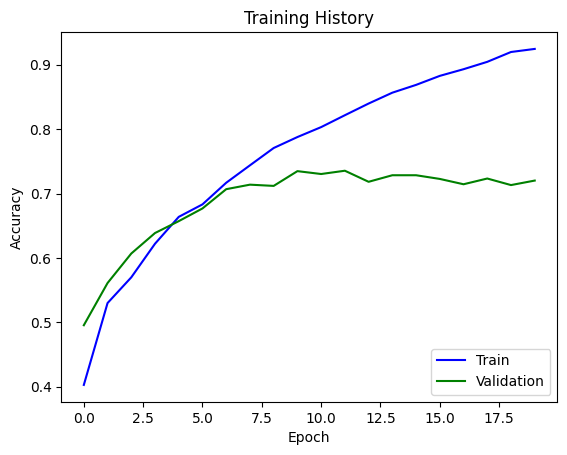

In [19]:
plt.plot(my_summary.history['accuracy'], c="b")
plt.plot(my_summary.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### 1.7. Testing:

In [20]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.694
